In [1]:
import numpy as np
import os
os.chdir('C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/')
from src import dataOrganizer as org
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras as ks

In [3]:
device = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(device))

Num GPUs Available:  0


In [3]:
# Load the dataset
source_dir = "C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/plates/"
data_dir = "C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_LAB6/data/"

In [5]:
dataorg = org.DataOrganizer(source_dir, data_dir)
dataorg.organize()

Organizing...
Done!


True

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 150),
    batch_size=10)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 150),
    batch_size=10)


Found 1204 files belonging to 36 classes.
Using 964 files for training.
Found 1204 files belonging to 36 classes.
Using 240 files for validation.


10
302


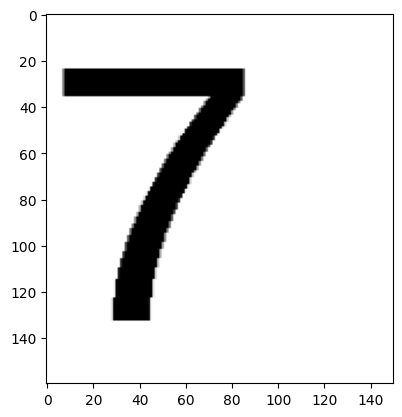

In [128]:
imgs, lbls = next(iter(train_ds))
plt.imshow(imgs[5].numpy().astype("uint8"), cmap="gray")
print(lbls[9].numpy())
imgs[5].numpy().astype("uint8")[100, 100]
print(len(os.listdir(source_dir)))

In [48]:
# creating a CNN model
cnn_model = ks.models.Sequential([
    ks.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 150, 3), padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    # ks.layers.Conv2D(128, (3, 3), activation='relu'),
    # ks.layers.MaxPooling2D((2, 2), strides=2, padding='valid'),
    ks.layers.Flatten(),
    ks.layers.Dense(64, activation='relu'),
    ks.layers.Dense(36, activation='softmax')
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 18, 64)        0

In [49]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
training_hist = cnn_model.fit(x=train_ds, validation_data=val_ds, epochs=10, verbose=2)

Epoch 1/10
97/97 - 13s - loss: 5.2468 - accuracy: 0.6878 - val_loss: 0.0403 - val_accuracy: 1.0000 - 13s/epoch - 135ms/step
Epoch 2/10
97/97 - 12s - loss: 0.0254 - accuracy: 0.9979 - val_loss: 0.0110 - val_accuracy: 1.0000 - 12s/epoch - 128ms/step
Epoch 3/10
97/97 - 13s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1659e-04 - val_accuracy: 1.0000 - 13s/epoch - 134ms/step
Epoch 4/10
97/97 - 13s - loss: 8.7005e-05 - accuracy: 1.0000 - val_loss: 4.2751e-05 - val_accuracy: 1.0000 - 13s/epoch - 135ms/step
Epoch 5/10
97/97 - 14s - loss: 3.0196e-05 - accuracy: 1.0000 - val_loss: 1.5671e-05 - val_accuracy: 1.0000 - 14s/epoch - 139ms/step
Epoch 6/10
97/97 - 14s - loss: 1.2021e-05 - accuracy: 1.0000 - val_loss: 7.1787e-06 - val_accuracy: 1.0000 - 14s/epoch - 142ms/step
Epoch 7/10
97/97 - 14s - loss: 5.7239e-06 - accuracy: 1.0000 - val_loss: 3.9195e-06 - val_accuracy: 1.0000 - 14s/epoch - 142ms/step
Epoch 8/10
97/97 - 18s - loss: 3.4536e-06 - accuracy: 1.0000 - val_loss: 2.5749e-06 - val_accura

In [11]:
os.chdir(source_dir)
os.chdir('..')
os.chdir('./models')
cnn_model.save('cnn_model_sequential_2.keras')

In [46]:
trained_cnn = ks.models.load_model('models/cnn_model_sequential_1.keras')
trained_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 18, 64)        0

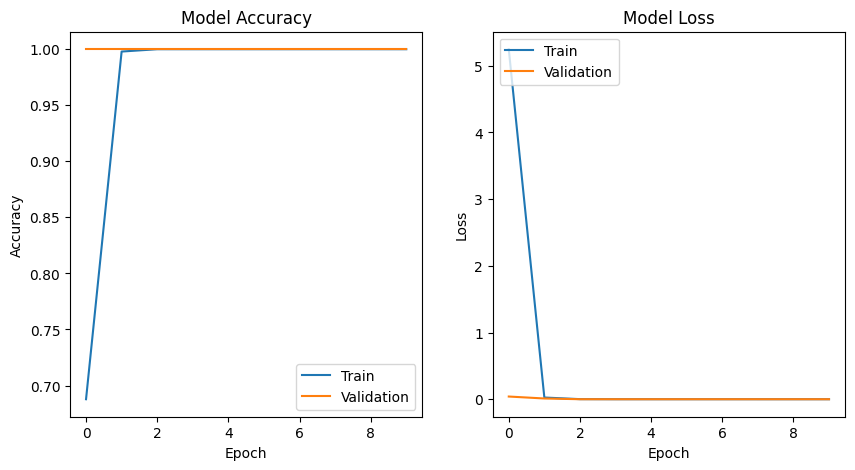

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(training_hist.history['accuracy'])
ax[0].plot(training_hist.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(training_hist.history['loss'])
ax[1].plot(training_hist.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [119]:
prediction_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(160, 150),
    batch_size=1)

Found 1204 files belonging to 36 classes.
Using 120 files for validation.


In [145]:
predictions = trained_cnn.predict(prediction_ds, verbose=2, steps=1)

1/1 - 0s - 45ms/epoch - 45ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 36)
16
(160, 150, 3)
0
(160, 150, 3)


(120, 160, 150, 3)

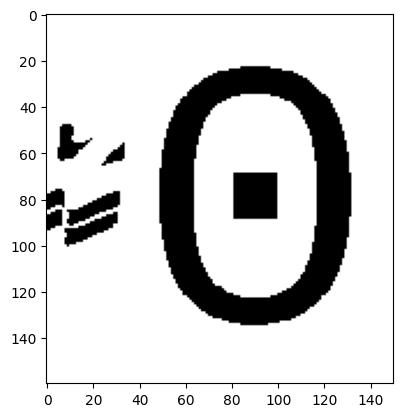

In [165]:
from numpy import shape


print((predictions.shape))
print(predictions[0].argmax())

predict_ds = list(prediction_ds.as_numpy_iterator())
print((predict_ds[0][0][0].shape))
# print(pred_ds[0])
    
plt.imshow(predict_ds[0][0][0])
print(predict_ds[0][1][0])
print(predict_ds[0][0][0].shape)

predict_xs = np.array(list(predict_ds[i][0][0] for i in range(len(predict_ds))))
shape(predict_xs)

In [167]:
prediction = trained_cnn.predict(x=predict_xs, verbose=2, steps=1)

1/1 - 0s - 365ms/epoch - 365ms/step


In [175]:
from sklearn.metrics import confusion_matrix
import itertools

In [172]:
# Classify predictions
actual_labels = np.array([predict_ds[i][1][0] for i in range(len(predict_ds))])
print(actual_labels)
prediction_labels = np.argmax(prediction, axis=1)
print(prediction_labels)

[ 0 17 16 11  9  2  8  9 33 18 30  0  8  0 25  1  8  8 32  7  3  1 21 17
  5  7 26  8 17  0 26  0 31 20 24  5  4 19  6 35 19 21  3 34  7  8 22 31
 28 19  9  0 16  2  4 13  4  4  5 30  0 27 24  8  2 30 14 33 25  6  0  8
  7  9  9  9  7  2  8  6  6  8 27 19  4  4  9 15 20  3  2  8 35 33  1  0
  9 21  0 30 20  9  7  6 10  0  1  3 24  7  5 12  1 20  1  1 32 28 31  1]
[ 0 17 16 11  9  2  8  9 33 18 30  0  8  0 25  1  8  8 32  7  3  1 21 17
  5  7 26  8 17  0 26  0 31 20 24  5  4 19  6 35 19 21  3 34  7  8 22 31
 28 19  9  0 16  2  4 13  4  4  5 30  0 27 24  8  2 30 14 33 25  6  0  8
  7  9  9  9  7  2  8  6  6  8 27 19  4  4  9 15 20  3  2  8 35 33  1  0
  9 21  0 30 20  9  7  6 10  0  1  3 24  7  5 12  1 20  1  1 32 28 31  1]


In [176]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix'):

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
        print("normalize confusion matrix")
    else:
        print("confusion matrix without normalization")

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center',
        color='white' if cm[i, j] > thresh else 'black')

confusion matrix without normalization
[[11  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  2]]


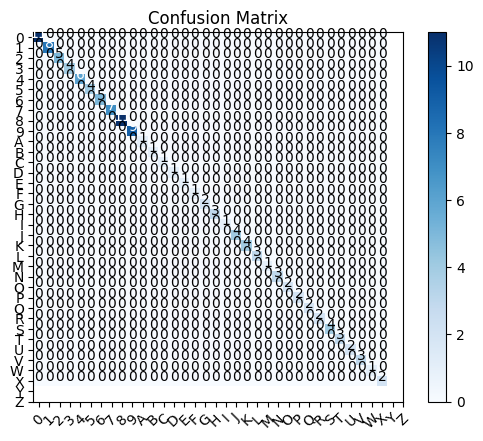

In [177]:
cm = confusion_matrix(actual_labels, prediction_labels)
cm_plot_labels = list(org.DataOrganizer.label_lst)
plot_cm(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')